In [1]:
#construct the model by using Keras

In [2]:
#import the packages
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.utils.data_utils import get_file

In [3]:
model=Sequential()

#Add the convolution layers and pooling layers
model.add(Conv2D(input_shape=(32, 32, 3), filters=64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

#Add the fully-connected layer
model.add(Flatten())
model.add(Dense(units=4096, activation='relu'))
model.add(Dense(units=4096, activation='relu'))
#output layer
model.add(Dense(units=10, activation='softmax'))
#check the model
model.summary()

# download imageNet training model
WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
filepath = get_file('vgg16_weights_tf_dim_ordering_tf_kernels.h5', WEIGHTS_PATH, cache_subdir='models')
model.load_weights(filepath, by_name=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [7]:


import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [8]:
#initialize some parameters
num_classes  = 10
batch_size   = 128
epochs       = 10
iterations   = 391
dropout      = 0.5
weight_decay = 0.0001
log_filepath = r'./vgg16_pretrain/'

In [9]:
#load the data
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# data preprocessing 
x_train[:,:,:,0] = (x_train[:,:,:,0]-123.680)
x_train[:,:,:,1] = (x_train[:,:,:,1]-116.779)
x_train[:,:,:,2] = (x_train[:,:,:,2]-103.939)
x_test[:,:,:,0] = (x_test[:,:,:,0]-123.680)
x_test[:,:,:,1] = (x_test[:,:,:,1]-116.779)
x_test[:,:,:,2] = (x_test[:,:,:,2]-103.939)

print(x_train.shape)
print(x_test.shape)

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
# download imageNet to train the model
WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
filepath = get_file('vgg16_weights_tf_dim_ordering_tf_kernels.h5', WEIGHTS_PATH, cache_subdir='models')
model.load_weights(filepath, by_name=True)

#set the optimizer of our model
from tensorflow.keras import optimizers
sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

C:\Users\prwro\.conda\envs\machineLearning\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [11]:
#set the learining rate
def scheduler(epoch):
    if epoch <= 80:
        return 0.01
    if epoch <= 140:
        return 0.005
    return 0.001

In [12]:
from keras.callbacks import LearningRateScheduler, TensorBoard
from keras.preprocessing.image import ImageDataGenerator

tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=0)
change_lr = LearningRateScheduler(scheduler)
cbks = [change_lr,tb_cb]

datagen = ImageDataGenerator(horizontal_flip=True,
        width_shift_range=0.125,height_shift_range=0.125,fill_mode='constant',cval=0.)

datagen.fit(x_train)

history = model.fit(datagen.flow(x_train, y_train,batch_size=batch_size),
                    steps_per_epoch=iterations,
                    epochs=epochs,
                    callbacks=cbks,
                    validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 53s 105ms/step - loss: 1.9446 - accuracy: 0.2723 - val_loss: 1.7213 - val_accuracy: 0.3499
Epoch 2/10
391/391 [==============================] - 38s 96ms/step - loss: 1.4680 - accuracy: 0.4633 - val_loss: 1.2065 - val_accuracy: 0.5605
Epoch 3/10
391/391 [==============================] - 38s 97ms/step - loss: 1.1478 - accuracy: 0.5890 - val_loss: 1.0594 - val_accuracy: 0.6335
Epoch 4/10
391/391 [==============================] - 38s 96ms/step - loss: 0.9428 - accuracy: 0.6681 - val_loss: 0.8235 - val_accuracy: 0.7183
Epoch 5/10
391/391 [==============================] - 37s 95ms/step - loss: 0.8125 - accuracy: 0.7165 - val_loss: 0.7818 - val_accuracy: 0.7347
Epoch 6/10
391/391 [==============================] - 38s 96ms/step - loss: 0.7267 - accuracy: 0.7504 - val_loss: 0.7242 - val_accuracy: 0.7613
Epoch 7/10
391/391 [==============================] - 37s 95ms/step - loss: 0.6490 - accuracy: 0.7771 - val_loss: 0.6804 - val_accuracy

In [13]:
model.save('CIFAR10_vgg16.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


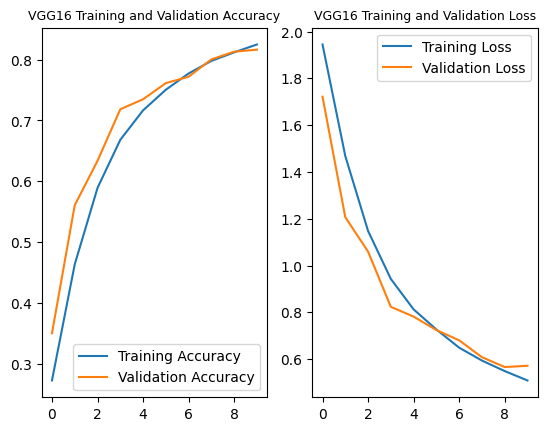

In [14]:
print(history.history.keys())

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('VGG16 Training and Validation Accuracy', fontsize=9)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('VGG16 Training and Validation Loss', fontsize=9)
plt.legend()

plt.show()
